<a href="https://colab.research.google.com/github/JonathanJuradoS/AprendizajeInstancias/blob/main/Aprendizaje_Basado_en_Instancias_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Aprendizaje Basado en Instancias - Ejemplo Práctico con k-NN


## ¿Qué es el aprendizaje basado en instancias?

El aprendizaje basado en instancias es un enfoque de aprendizaje automático donde:

- No se crea un modelo explícito durante el entrenamiento.
- Las instancias se almacenan directamente y se utilizan durante la predicción.
- La predicción se realiza comparando una nueva instancia con las ya almacenadas usando una métrica de similitud o distancia.

**k-Nearest Neighbors (k-NN)** es el ejemplo clásico de este enfoque. La idea central es que las instancias similares tendrán etiquetas similares.


## 📦 Preparación de los datos

In [1]:

import pandas as pd

# Cargar el dataset generado
df = pd.read_csv("/content/dataset_clientes_gimnasio.csv")

# Mostrar las primeras filas
df.head()


,Edad,Nivel_Actividad,Tiempo_Miembro,Tipo_Cliente
0,56,0,39,Nuevo
1,46,3,44,Ocasional
2,32,4,18,Frecuente
3,60,4,31,Frecuente
4,25,6,26,Frecuente



## 🔎 Entendiendo el dataset

Este dataset simula información de clientes de un gimnasio. Las características son:

- **Edad**: Edad del cliente.
- **Nivel_Actividad**: Veces que asiste al gimnasio por semana.
- **Tiempo_Miembro**: Cuántos meses lleva inscrito.
- **Tipo_Cliente**: Etiqueta que indica si es Frecuente, Ocasional o Nuevo.

Nuestro objetivo es predecir `Tipo_Cliente`.


## 📊 Dividir datos en entrenamiento y prueba

In [2]:

from sklearn.model_selection import train_test_split

# Definir características y etiquetas
X = df[["Edad", "Nivel_Actividad", "Tiempo_Miembro"]]
y = df["Tipo_Cliente"]

# Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()


,Edad,Nivel_Actividad,Tiempo_Miembro
1840,42,2,21
2115,33,6,20
4437,37,0,5
1146,22,1,2
2486,42,6,58


## 🤖 Crear y entrenar el modelo k-NN

In [3]:

from sklearn.neighbors import KNeighborsClassifier

# Crear el clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 es la distancia Euclidiana

# Ajustar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)


KNeighborsClassifier()

## 📈 Realizar predicciones y evaluar el modelo

              precision    recall  f1-score   support

   Frecuente       0.92      0.96      0.94       503
       Nuevo       0.88      0.87      0.88       443
   Ocasional       0.85      0.83      0.84       554

    accuracy                           0.88      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.88      0.88      0.88      1500



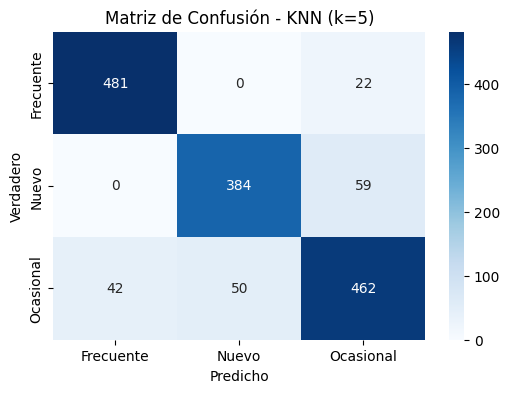

In [4]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir las etiquetas del conjunto de prueba
y_pred = knn.predict(X_test)

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - KNN (k=5)")
plt.show()


## 🚀 Interpretación de Resultados


El modelo k-NN con k=5 logró una precisión aproximada del 88%.

- La clase **Frecuente** fue la más fácil de predecir, con una alta precisión.
- **Ocasional** mostró cierta confusión, lo cual es común ya que se encuentra entre "Nuevo" y "Frecuente".
- **Nuevo** tuvo un desempeño aceptable, pero mejorable.

### ¿Cómo mejorar?
- Cambiar el valor de k y observar cómo varían las métricas.
- Probar otras métricas de distancia (por ejemplo, Manhattan o Chebyshev).
- Normalizar los datos para que las variables estén en la misma escala.


## 🧠 Reflexión sobre Aprendizaje Basado en Instancias


Este ejemplo práctico muestra las características del aprendizaje basado en instancias:

- **No se crea un modelo explícito**: Solo se almacenan las instancias.
- **Predicción en tiempo real**: Al llegar un nuevo dato, se calcula su distancia respecto a todas las instancias.
- **Influencia directa de los datos**: Si las instancias cambian, las predicciones también lo hacen inmediatamente.
- **Flexible y simple de interpretar**: El resultado se explica directamente por las instancias vecinas.

Es una técnica efectiva para problemas de clasificación donde las relaciones son difíciles de modelar o donde se requiere alta interpretabilidad.
